Group 33: Breitenecker Johannes, Dasovic Ivana, Thurner Lukas
    
# Exercise n°1: Classification

## Car dataset

For this exercise we will try to predict whether a car with some specifications is acceptable.

## Data preprocessing

### Import libraries 

In [205]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
import sklearn as sk

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
import time
from scipy.stats import randint 
from sklearn.preprocessing import LabelEncoder

### Import dataset

In [206]:
car_data = pd.read_csv("Car.csv", delimiter = ";")

In [207]:
car_data.head()

,buying,maint,persons,doors,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [208]:
num_rows, num_cols = car_data.shape
print(f'Number of columns is {num_cols} and number of row is {num_rows}')

Number of columns is 7 and number of row is 1728


In [209]:
column_names = ''
for col in car_data.columns:
    column_names += col + ', '
print(f' columns are: {column_names[:-2]}')

 columns are: buying, maint, persons, doors, lug_boot, safety, class


### Missing Values

In [210]:
missing_values_count = car_data.isnull().sum()

print(missing_values_count)

buying      0
maint       0
persons     0
doors       0
lug_boot    0
safety      0
class       0
dtype: int64


As it is visible, in this dataset there are no missing values

### Label encoding

In [211]:
le = LabelEncoder()
car_data = car_data.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
car_data.head()

,buying,maint,persons,doors,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [212]:
best_models = {}

### Splitting dataset to train and test data

In [213]:
X = car_data.drop('class', axis=1)
y = car_data['class']
    
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3)

## Classifier n°1: decision tree

In [214]:
decision_tree = tree.DecisionTreeClassifier()
parameters = {'criterion': ['entropy', 'gini'],
                'splitter': ['best', 'random'],
                'max_depth': randint(1, 50),
                'min_samples_split':  randint(2, 1000)}

#### Finding the best decision tree

In [215]:
best_decision_tree = sk.model_selection.RandomizedSearchCV(estimator = decision_tree, param_distributions = parameters, cv = 2, n_iter = 500)
best_decision_tree.fit(X_train, y_train)

print("Random Search CV results" )
print("\n The best estimator:\n", best_decision_tree.best_estimator_)
print("\n The best score:\n", best_decision_tree.best_score_)
for param, value in best_decision_tree.best_params_.items():
    print("\t ", param, ": ", value)
print("\n The best cross validation strategy:\n", best_decision_tree.cv)

Random Search CV results

 The best estimator:
 DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=3)

 The best score:
 0.9437469213507744
	  criterion :  entropy
	  max_depth :  28
	  min_samples_split :  3
	  splitter :  best

 The best cross validation strategy:
 2


In [216]:
start_time = time.time()
best_dt_model = best_decision_tree.best_estimator_
best_dt_model = best_dt_model.fit(X_train,y_train)  
best_dt_prediction = best_dt_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['decision_tree'] = best_dt_model

--- runtime --- 0.00936579704284668


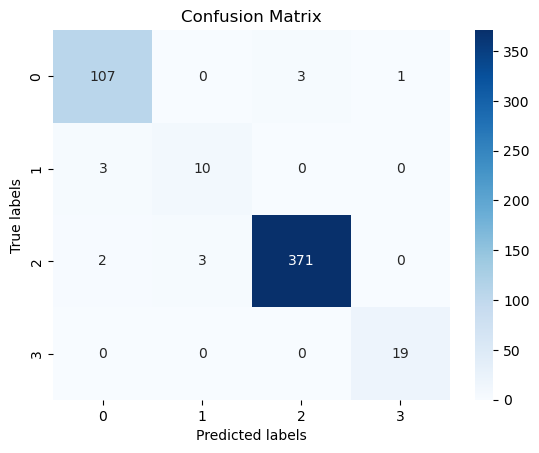

accuracy: 0.976878612716763
precision: 0.9770300579506633
recall: 0.976878612716763
F1: 0.9769216439659945
Cross validated scores: [0.97107438 0.95867769 0.96694215 0.95867769 0.94605809]


In [217]:
best_dt_cm = metrics.confusion_matrix(y_test, best_dt_prediction)
sns.heatmap(best_dt_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_dt_prediction))
print("precision:",metrics.precision_score(y_test,best_dt_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_dt_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_dt_prediction, average='weighted'))

cv_scores = cross_val_score(best_dt_model,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

[Text(0.5319496268656716, 0.9642857142857143, 'X[3] <= 0.5\nentropy = 1.239\nsamples = 1209\nvalue = [273, 56, 834, 46]'),
 Text(0.5170242537313433, 0.8928571428571429, 'entropy = 0.0\nsamples = 404\nvalue = [0, 0, 404, 0]'),
 Text(0.546875, 0.8928571428571429, 'X[5] <= 0.5\nentropy = 1.516\nsamples = 805\nvalue = [273, 56, 430, 46]'),
 Text(0.28171641791044777, 0.8214285714285714, 'X[0] <= 2.5\nentropy = 1.706\nsamples = 286\nvalue = [151, 26, 63, 46]'),
 Text(0.1455223880597015, 0.75, 'X[0] <= 0.5\nentropy = 1.669\nsamples = 218\nvalue = [121, 26, 25, 46]'),
 Text(0.05970149253731343, 0.6785714285714286, 'X[1] <= 2.5\nentropy = 0.876\nsamples = 71\nvalue = [50, 0, 21, 0]'),
 Text(0.04477611940298507, 0.6071428571428571, 'X[2] <= 0.5\nentropy = 0.314\nsamples = 53\nvalue = [50, 0, 3, 0]'),
 Text(0.029850746268656716, 0.5357142857142857, 'X[4] <= 1.5\nentropy = 0.696\nsamples = 16\nvalue = [13, 0, 3, 0]'),
 Text(0.014925373134328358, 0.4642857142857143, 'entropy = 0.0\nsamples = 10\nva

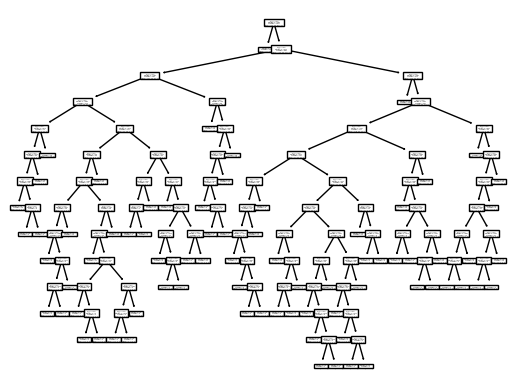

In [218]:
tree.plot_tree(best_dt_model)

## Classifier n°2: random forest

In [219]:
random_forest = RandomForestClassifier()
parameters = {'criterion': ['entropy', 'gini'],
                'max_depth': randint(1, 50),
                'min_samples_split':  randint(2, 1000),
                'max_features': ['sqrt', 'log2', None]}

#### Finding the best random forest

In [220]:
best_random_forest = sk.model_selection.RandomizedSearchCV(estimator=random_forest, param_distributions = parameters,cv = 2, n_iter = 500, n_jobs=-1)
best_random_forest.fit(X_train, y_train)

print("Random Search CV results" )
print("\n The best estimator:\n", best_random_forest.best_estimator_)
print("\n The best score:\n", best_random_forest.best_score_)
for param, value in best_random_forest.best_params_.items():
    print("\t ", param, ": ", value)
print("\n The best cross validation strategy:\n", best_random_forest.cv)

Random Search CV results

 The best estimator:
 RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=9)

 The best score:
 0.9263874445843139
	  criterion :  gini
	  max_depth :  20
	  max_features :  None
	  min_samples_split :  9

 The best cross validation strategy:
 2


In [221]:
start_time = time.time()
best_rf_model = best_random_forest.best_estimator_
best_rf_model = best_rf_model.fit(X_train,y_train)  
best_rf_prediction = best_rf_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['random_forest'] = best_rf_model

--- runtime --- 0.10376620292663574


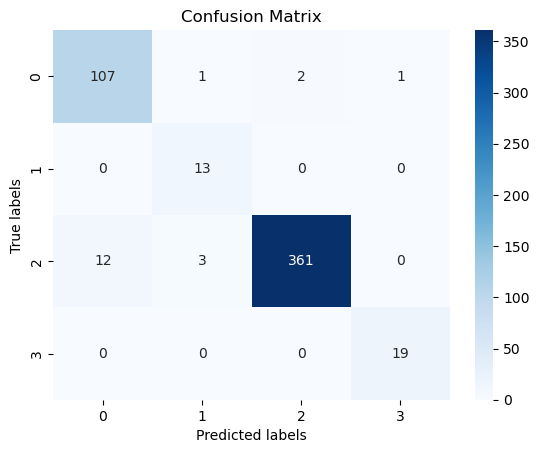

accuracy: 0.9633911368015414
precision: 0.9667172905882684
recall: 0.9633911368015414
F1: 0.9641776910636665
Cross validated scores: [0.95867769 0.95041322 0.95454545 0.97107438 0.9253112 ]


In [222]:
best_rf_cm = metrics.confusion_matrix(y_test, best_rf_prediction)
sns.heatmap(best_rf_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_rf_prediction))
print("precision:",metrics.precision_score(y_test,best_rf_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_rf_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_rf_prediction, average='weighted'))

cv_scores = cross_val_score(best_rf_model,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

## Classifier n°3: KNN

In [223]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': randint(1,50),
              'weights': ['uniform', 'distance'],
              'algorithm': ['brute']
}

#### Finding the best KNN

In [224]:
best_KNN = sk.model_selection.RandomizedSearchCV(estimator=knn, param_distributions = parameters, cv = 2, n_iter = 500, n_jobs=-1)
best_KNN.fit(X_train, y_train)

print("Random Search CV results" )
print("\n The best estimator:\n", best_KNN.best_estimator_)
print("\n The best score:\n", best_KNN.best_score_)
for param, value in best_KNN.best_params_.items():
    print("\t ", param, ": ", value)
print("\n The best cross validation strategy:\n", best_KNN.cv)


Random Search CV results

 The best estimator:
 KNeighborsClassifier(algorithm='brute', n_neighbors=3)

 The best score:
 0.8552569645886925
	  algorithm :  brute
	  n_neighbors :  3
	  weights :  uniform

 The best cross validation strategy:
 2


In [230]:
start_time = time.time()
best_knn_model = best_KNN.best_estimator_
best_knn_model = best_knn_model.fit(X_train,y_train)  
best_knn_prediction = best_knn_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['knn'] = best_knn_model

--- runtime --- 0.03214669227600098


C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


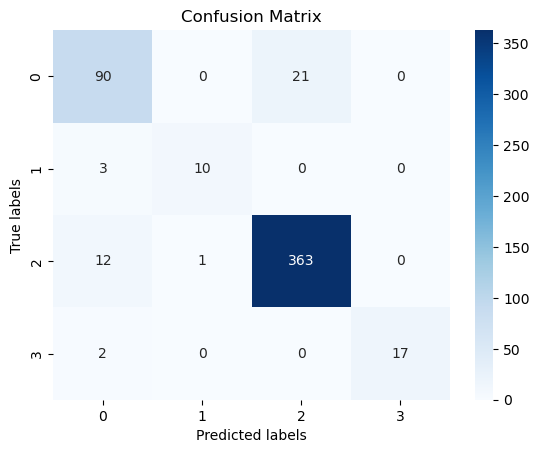

accuracy: 0.9248554913294798
precision: 0.9241236373785938
recall: 0.9248554913294798
F1: 0.9241003878477607
Cross validated scores: [0.87190083 0.88842975 0.92561983 0.88429752 0.87551867]


C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [226]:
best_knn_cm = metrics.confusion_matrix(y_test, best_knn_prediction)
sns.heatmap(best_knn_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_knn_prediction))
print("precision:",metrics.precision_score(y_test,best_knn_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_knn_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_knn_prediction, average='weighted'))

cv_scores = cross_val_score(best_knn_model,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

## Evaluation

In [227]:
def eval_function(y_test, best_prediction):
    print("accuracy:",metrics.accuracy_score(y_test,best_prediction))
    print("precision:",metrics.precision_score(y_test,best_prediction, average='weighted'))
    print("recall:",metrics.recall_score(y_test,best_prediction, average='weighted'))
    print("F1:",metrics.f1_score(y_test,best_prediction, average='weighted'))


In [228]:
best_prediction_dict = {}
for name, best_model in best_models.items():
    best_prediction_dict[name] = best_model.predict(X_test)

C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [229]:
for name, best_prediction in best_prediction_dict.items():
    print(f'\t {name} ')
    eval_function(y_test, best_prediction)
    print('\n')

	 decision_tree 
accuracy: 0.976878612716763
precision: 0.9770300579506633
recall: 0.976878612716763
F1: 0.9769216439659945


	 random_forest 
accuracy: 0.9633911368015414
precision: 0.9667172905882684
recall: 0.9633911368015414
F1: 0.9641776910636665


	 knn 
accuracy: 0.9248554913294798
precision: 0.9241236373785938
recall: 0.9248554913294798
F1: 0.9241003878477607


